In [2]:
import os
import shutil
import pickle
import navis
import numpy as np
import pandas as pd
from PIL import Image,ImageOps,ImageDraw, ImageFont
import nrrd# Some sample numpy
import plotly
import sys,os
sys.path.append('D:/code/neuron-vis/neuronvis/neuronVis')
import IONData as IONData
import SwcLoader as SwcLoader
sys.path.append('D://code//neuron-vis/core/code')

import GenerateterminalMatrix as GenerateterminalMatrix
import matplotlib.pyplot as plt
from collections import Counter
import HierarchicalClustering as HierarchicalClustering
from Plot import tSNE_Plot as tSNE_Plot
from Plot import Clustering_Plot as Clustering_Plot

from Plot import Soma_Dotplot as Soma_Dotplot
from sklearn import manifold, datasets
from scipy.cluster import hierarchy
import seaborn as sns
%matplotlib inline
iondata=IONData.IONData()
tree=SwcLoader.NeuronTree()
generatematrix=GenerateterminalMatrix.GenerateterminalMatrix()
clustering=HierarchicalClustering.HierarchicalClustering()
tsneplot=tSNE_Plot()
clusteringplot=Clustering_Plot()

In [26]:
import Scene
import pandas as pd
c1_scene=Scene.scene2List("E:/neuroview/data/scene/3Mcluster1.nv")
c1_scene=pd.DataFrame(c1_scene)
c1_list=list(c1_scene['sampleid']+c1_scene['name'])
c2_scene=Scene.scene2List("E:/neuroview/data/scene/3Mcluster2.nv")
c2_scene=pd.DataFrame(c2_scene)
c2_list=list(c2_scene['sampleid']+c2_scene['name'])
c3_scene=Scene.scene2List("E:/neuroview/data/scene/3Mcluster3.nv")
c3_scene=pd.DataFrame(c3_scene)
c3_list=list(c3_scene['sampleid']+c3_scene['name'])
c4_scene=Scene.scene2List("E:/neuroview/data/scene/noiso_project.nv")
c4_scene=pd.DataFrame(c4_scene)
c4_list=list(c4_scene['sampleid']+c4_scene['name'])
neuronlist=c1_list+c2_list+c3_list+c4_list

# 构建一个空的 DataFrame
cluster_eachNeuron = pd.DataFrame(columns=['ID', 'Source'])

# 遍历每个 list，把数据添加到 DataFrame 中
for idx, lst in enumerate([c1_list, c2_list, c3_list, c4_list], start=1):
    temp_df = pd.DataFrame({'ID': lst, 'cluster_id': f'{idx}'})
    cluster_eachNeuron = pd.concat([cluster_eachNeuron, temp_df], ignore_index=True)

print(cluster_eachNeuron)

                ID Source cluster_id
0    220240031.swc    NaN          1
1    220240035.swc    NaN          1
2    220241019.swc    NaN          1
3    220241020.swc    NaN          1
4    220241021.swc    NaN          1
..             ...    ...        ...
138  231630027.swc    NaN          4
139  220241023.swc    NaN          4
140  231628018.swc    NaN          4
141  220241060.swc    NaN          4
142  221643002.swc    NaN          4

[143 rows x 3 columns]


In [21]:
#获取各个神经元在不同脑区的axon length 数量
import GenerateMatrix as GenerateMatrix
left_neuronlist=[]
for n in neuronlist:
    somaposition=iondata.getNeuronPropertyByID(n[:6],n[6:])['somapoint']
    if somaposition[2]<5700:
        left_neuronlist.append(n)

generatematrix=GenerateMatrix.GenerateMatrix()
generatematrix.generate_terminal_matrix(neuronlist,st_level=8,flip=None,normalized=False,terminal=False)
neurondata_st8=generatematrix.terminaldata

json_error=neurondata_st8.sum()[neurondata_st8.sum()==0]
print('error in json',json_error)

220240031.swc
220240035.swc
220241019.swc
220241020.swc
220241021.swc
220241055.swc
220241056.swc
221624045.swc
221624048.swc
221624084.swc
221624179.swc
221624180.swc
221612003.swc
221612004.swc
221612006.swc
221612007.swc
221612008.swc
221612016.swc
221612018.swc
221612019.swc
221612020.swc
221612046.swc
221612062.swc
221612077.swc
221612079.swc
221612080.swc
221643026.swc
231628015.swc
231630004.swc
231630025.swc
220240004.swc
220241010.swc
220241012.swc
220241015.swc
220241061.swc
221624047.swc
221624050.swc
221624097.swc
221612076.swc
221612078.swc
221643007.swc
221643011.swc
221643025.swc
231628005.swc
231628008.swc
231628031.swc
231629006.swc
231629008.swc
231630006.swc
231630008.swc
231630010.swc
231630011.swc
231630012.swc
231630023.swc
231630029.swc
231630030.swc
231630031.swc
210661077.swc
220240001.swc
220240033.swc
220241011.swc
220241018.swc
220241022.swc
220241024.swc
220241025.swc
220241026.swc
220241028.swc
220241029.swc
220241034.swc
220241035.swc
220241043.swc
220241

In [22]:
#需要翻转的右侧神经元
left_neuronlist_tem=[x for x in neurondata_st8.columns if x in left_neuronlist]

#对右侧脑内神经元进行翻转
left_region=[x for x in neurondata_st8.index if 'left' in x]
right_region=[x for x in neurondata_st8.index if 'right' in x]

for n in left_neuronlist_tem:
    # print(n)
    left_tem=neurondata_st8.loc[left_region,n]
    right_tem=neurondata_st8.loc[right_region,n]
    neurondata_st8.loc[left_region,n]=list(right_tem)
    neurondata_st8.loc[right_region,n]=list(left_tem.values)

neurondata_st8

,220240031.swc,220240035.swc,220241019.swc,220241020.swc,220241021.swc,220241055.swc,220241056.swc,221624045.swc,221624048.swc,221624084.swc,...,221624051.swc,220241059.swc,221643004.swc,220241031.swc,221643008.swc,231630027.swc,220241023.swc,231628018.swc,220241060.swc,221643002.swc
AI.left,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FRP.left,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MOs.left,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ORB.left,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PL.left,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RR.right,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
VTA.right,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
P.right,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PB.right,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
region_st5_all=['Isocortex',
         'OLF',
         'HPF',
         'CTXsp',
         'STR',
         'PAL',
         'TH',
         'HY',
         'MB',
         'P',
         'MY',
         'CBX',
         'CBN']
 
primary_region=[x for x in neurondata_st8.index if not x[:x.index('.')] in region_st5_all]
neurondata_st8=neurondata_st8.loc[primary_region]
shortneuron=neurondata_st8.sum()[neurondata_st8.sum()<3000].index.to_list()
longneuron=[x for x in neurondata_st8.columns if not x in shortneuron]

neurondata_st8_screen=neurondata_st8
neurondata_st8_screen=neurondata_st8_screen[neurondata_st8_screen>500]#
neurondata_st8_screen=neurondata_st8_screen.dropna(axis=0,how='all')
neurondata_st8_screen=neurondata_st8_screen.fillna(0)
neurondata_st8_screen=neurondata_st8_screen.astype(float)

region_tem=(neurondata_st8_screen>0).sum(axis=1)
region_tem=region_tem[region_tem>3].index.to_list()
neurondata_st8_screen=neurondata_st8_screen.loc[region_tem]



neurondata_st8_screen_norm=neurondata_st8_screen/neurondata_st8_screen.sum()
for b in neurondata_st8_screen_norm.loc[:,neurondata_st8_screen_norm.isnull().all()].columns:
    del neurondata_st8_screen_norm[b]
    del neurondata_st8_screen[b]

neurondata_st8_screen_length=neurondata_st8_screen
neurondata_st8_screen=np.log(neurondata_st8_screen+1)
neurondata_st8_screen



,220240031.swc,220240035.swc,220241019.swc,220241020.swc,220241021.swc,220241055.swc,220241056.swc,221624045.swc,221624048.swc,221624084.swc,...,221624051.swc,220241059.swc,221643004.swc,220241031.swc,221643008.swc,231630027.swc,220241023.swc,231628018.swc,220241060.swc,221643002.swc
AI.right,7.233457,0.000000,0.000000,0.000000,0.000000,7.002094,0.000000,0.000000,6.651058,6.995732,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
FRP.right,8.011887,0.000000,6.363033,0.000000,0.000000,7.387609,6.375934,0.000000,0.000000,8.377001,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
MOs.right,8.195374,9.290830,9.848201,8.488361,9.180560,8.021825,0.000000,9.919376,9.407368,9.080516,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ORB.right,8.668748,0.000000,0.000000,0.000000,7.155876,8.682094,10.113334,0.000000,7.172867,7.410778,...,0.000000,0.00000,6.369061,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
PL.right,0.000000,0.000000,0.000000,0.000000,0.000000,7.030872,0.000000,0.000000,0.000000,7.702276,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ACA.right,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.517394,0.000000,0.000000,7.668003,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
GU.right,0.000000,6.752592,0.000000,0.000000,0.000000,0.000000,0.000000,6.337532,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
MOp.right,0.000000,7.365734,8.199241,8.278689,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
SSp.right,0.000000,7.034200,0.000000,6.717361,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
SSs.right,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.326040,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


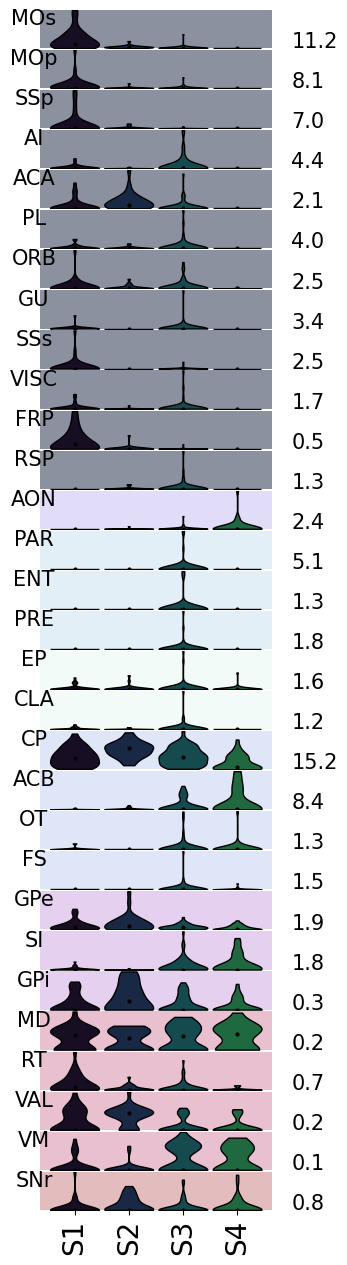

In [49]:
#筛出用于violinplot的脑区
#sys.path.append('G:/DATA/spinal_projection_neurons/fmost analysis/code/projectome_analysis')
import BrainRegions
brainregions=BrainRegions.BrainRegions()

region_violin=neurondata_st8_screen_length.sum(axis=1).sort_values(ascending=False).index.to_list()[:30]
# region_violin.append(b)


region_sort=[]

left_region=[x for x in region_violin if 'left' in x]
right_region=[x for x in region_violin if 'right' in x]

region_st5_show={}
for st5 in region_st5_all:
    for n in left_region:
        if brainregions.merge_region(n[:n.index('.')],5) ==st5:
            region_sort.append(n)
            region_st5_show[n]=st5
for st5 in region_st5_all:
    for n in right_region:
        if brainregions.merge_region(n[:n.index('.')],5) ==st5:
            region_sort.append(n)
            region_st5_show[n]=st5

data_violin=neurondata_st8_screen_length.loc[region_sort]


#设置显示颜色
clusters = sorted(set(cluster_eachNeuron['cluster_id']))

region_st5_show_sort=[]
for st5 in region_st5_all:
    for b in set(region_st5_show.values()):
        if st5==b:
            region_st5_show_sort.append(b)

current_palette=sns.color_palette("cubehelix",12)[:]

region5_palette=sns.color_palette("cubehelix",20)
region5_palette=[region5_palette[7],region5_palette[1],region5_palette[11],region5_palette[12],region5_palette[14],region5_palette[16],region5_palette[-1],region5_palette[17],region5_palette[15],region5_palette[2]]
region5_palette.reverse()
region5_palette=dict(zip(region_st5_show_sort,region5_palette))
region5_palette


#violin_plot
plt.figure(figsize=(3,15))
n_f=0
for b in data_violin.index:
        n_f+=1
        plt.subplot(len(data_violin.index),1,n_f)
        data_plotter=[]
        
        for c in clusters:
                neuronlist_tem=cluster_eachNeuron[cluster_eachNeuron['cluster_id']==c]['ID'].to_list()
                data_plotter.append(np.array(data_violin.loc[b,neuronlist_tem]))
        
        ax=plt .gca()
        parts = ax.violinplot(
                data_plotter, showmeans=False, showmedians=False,
                showextrema=False,widths=0.9)

        n_cluster=0
        for pc in parts['bodies']:
                n_cluster+=1
                pc.set_facecolor(current_palette[n_cluster-1])
                pc.set_edgecolor('black')
                pc.set_alpha(1)

        for i,d in enumerate(data_plotter):
                min_value,quantile1, median, quantile3, max_value = np.percentile(d, [0, 25, 50, 75, 100])
                plt.scatter(i+1, median, color='black',s=4,zorder=4)
                # plt.vlines(i+1,quantile1, quantile3, lw=9, zorder=3)
                # plt.vlines(i+1,min_value, max_value, zorder=2)

        # y_max=max(np.array(data_plotter).flatten())
        # plt.text(6.5,
        # 0,
        # str('%.2f' % y_max),
        # fontsize=15)

        all_tem=[]
        for x in data_plotter:
                all_tem+=list(x) 
        y_max=np.max(all_tem)

        plt.ylim(0, y_max)
        plt.text(5,
        0,
        str('%.1f' % (y_max/10000)),
        fontsize=15)

        plt.yticks([])
        plt.ylabel(b[:b.index('.')],fontsize=15,rotation=0)
        if b !=data_violin.index[-1]:
                plt.xticks([])
        elif b ==data_violin.index[-1]:
                plt.xticks(range(1,len(clusters)+1),['S'+str(x) for x in clusters],fontsize=20,rotation=90)
                # ax.set_xticklabels (clusters,fontsize=20)

        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)

        
        ax.patch.set_facecolor(region5_palette[brainregions.merge_region(b[:b.index('.')],5)])
        ax.patch.set_alpha(0.5)


plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.05)

plt.rcParams['svg.fonttype']='none'
plt.rcParams['pdf.fonttype'] = 42   # TrueType，可编辑
plt.rcParams['ps.fonttype'] = 42    # 避免转成 Type3
plt.savefig('D:/Figure/25/Figure S4/cluster_violin.pdf', format='pdf', bbox_inches='tight')


In [44]:
%matplotlib inline
ax.violinplot(
                data_plotter, positions=[1,2,3,4],vert=False,showmeans=False, showmedians=False,
                showextrema=False,widths=0.9)
plt.show()